# Mateusz Kojro - Metody numeryczne

## Zadanie 14
Dane jest równanie różniczkowe: $\frac{dy}{dx} = -\sin{x}\sqrt{y}$  Rozwiązać  równanie  *ulepszoną  metodą  Eulera* z warunkiem poczatkowym $y(\pi)=0$ dla przedzialu $x \in < \pi, \frac{3\pi}{2} >$ z krokiem $h = \frac{\pi}{20}$. Przedstawic rozwiazanie graficznie.

## Implementacja ulepszonej metody Eulera
Zaimplementujemy funkcje euler ktorej zadaniem bedzie wykonanie tzw. __*Poprawionej metody Eulera*__ inaczej czasami zwana __*metoda Heuna*__. Ktora najczescie przedstawiamy w postaci:

$y_{n+1} = y_n + \frac{h}{2} [f(x_n, y_n) + f(x_n + h, y_n + h f(x_n, y_n))]$

dla $n = 0,1,...,N$

W celu latwiejszego protypowania i wykonania analizy funkcja zostanie napiasna zarowno w jezyku `Python` jak i `C++`.

```c++
std::vector<double> 
euler(double (*f)(double, double), double start,
                                 double stop, double h, double y_0) {
    std::vector<double> results;

    // Ustawiamy poczatkowy numer iteracji na 0
    int n = 0;
    
    // Poczatkowa wartosc y_n to po prostu wartosc stala podana
    double y_n = y_0;

    // Przechodzimy po calym zadanym zakresie z podanym krokiem
    for (double x = start; x <= stop; x += h) {
        
        // Liczymy zmmiane y w punkcie x_n, y_n
        double f_n = f(x, y_n);
        
        // Liczymy zmmiane w kolejenym punkcie
        double f_m = f(x + h, y_n + h * f_n);
  
        // Wartosc y(x_n) jest rowna w przyblizeniu
        // poczatkowej wartosci nad ktora nadbudujemy kolejne 
        // zmiany dy/dx otrzymujac wartosci y_n. Ulepszenie nad 
        // Metoda Eulera polaga na dodawaniu sredniej pomiedzy kolejnymi punktami
        y_n = y_n + (h / 2.0) * (f_n + f_m);
  
        results.push_back(y_n);
  
        n++;
    }
    
    // Zwracamy otrzymane wartosci y_n dla podanych x_n
    return results;
}
```
pamietajac o zalaczeniu pliku naglowkowego za pomoca komendy:
```C++
#include <vector>
```

In [1]:
# Importowanie odpowiednich bibliotek
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def euler(f, start, stop, h, y_0):
    result = []
    domain = np.arange(start, stop, h)
    y_n = y_0
    for n, x in enumerate(domain):
        f_n = f(x,y_n)
        f_m = f(x + h, y_n + h * f(x, y_n))
        y_n = y_n + (h/2.0) * (f_n + f_m)
        result.append(y_n)
    return result

## Rozwiazanie zadania 14
### Podejscie standardowne
Implementujemy badana w zadaniu 14 funkcje $f(x, y) = \frac{dy}{dx}=-\sin{x}\sqrt{y}$

In [3]:
def f(x, y):
    return -np.sin(x) * np.sqrt(y)

W `C++` wygladac ona bedzie w nastepujacy sposob:

```c++
double f(double x, double y) { return -sin(x) * sqrt(y); }
```
nalezy przy tym pamietac o zalaczeniu plikow naglowkowych zawierajacych definicje funkcji `sin` i `sqrt` poprzez umieszczenie
```c++
#include <cmath>
```
na poczatku pliku

Moezemy nastepnie podstawic podane w zadaniu wartosci do odpowiednich argumentow funkcji `euler`

In [4]:
start = np.pi
stop = (3.0 * np.pi)/2.0
step = np.pi/20.0
y_0 = 0.0
result = euler(f, start, stop, step, y_0)

Co mozemy nastepnie przedstawic na wykresie:

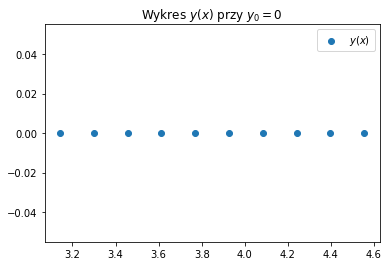

In [5]:
plt.scatter(np.arange(start,stop,step),result)
plt.title('Wykres $y(x)$ przy $y_0=0$')
plt.legend(['$y(x)$'])

Otrzymujemy dla wszystkich iteracji funkcji `euler` wartość $0$ moglismy sie jednak tego spodziewac ponieważ:

$y(\pi)=0$ i $f(x, y=0) = 0$  $\forall_{x\in \!R}$ 

w zwiazku z tym w wszytskich kolejnycch iteracjach rowniez otrzymamy $0$.

Aby upewnic sie co do otrzymanych wynikow wpisujemy odpowiednie zapytanie w usluge __*Wolfram Alpha*__

![wolfram.png](wolfram.png)

Odpowiadajacy powyzszemu zapytaniu kod __*Mathematica*__:
```Mathematica
HeunCoefficients[2, p_] := N[{{{2/3}}, {1/4, 3/4}, {2/3}}, p];

NDSolve[{
      y '[x] == -(Sin[x] Sqrt[y[x]]), y[Pi] == 0}, y, {x, Pi, (3 Pi)/2}, Method-> {"FixedStep", Method -> {"ExplicitRungeKutta", "DifferenceOrder" -> 2, "Coefficients" -> HeunCoefficients}}, StartingStepSize -> π/20, 
          MaxStepFraction -> 1/10, WorkingPrecision -> MachinePrecision]
```

### Proba poprawienia rozwiazania
Jezeli jednak zalozymy $y(\pi) = 0 + \epsilon$ dla dowonie malego $\epsilon > 0$ wykres ktory otrzymamy uzywajac ulepszonej metody Eulera bedzie przyblizeniem $y(x)$

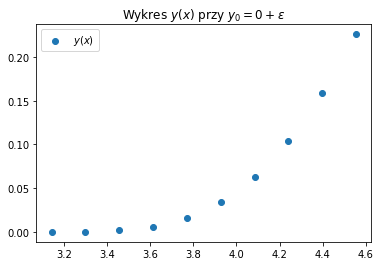

In [6]:
start = np.pi
stop = (3.0 * np.pi)/2.0
step = np.pi/20.0
y_0 = 0.1e-6
result = euler(f, start, stop, step, y_0)
plt.scatter(np.arange(start,stop,step),result)
plt.title('Wykres $y(x)$ przy $y_0=0 + \epsilon$')
plt.legend(['$y(x)$'])

Otrzymany wykres zgadza sie wtedy z wykresem funkcji otrzymanej analitycznie wykreslonym przez __Wolfram Alpha__

## Sprawdzenie poprawnosci implementacji
Aby sprawdzic poprawnosc zaimplementowanej metody mozemy wykorzystac proste do rozwiazania rownanie 

$g(x) = \frac{dy}{dx} = y$

Ktorego rozwiazaniem jest oczywiscie funkcja $y(x) = e^x$

przy wspolczynniku poczatkowym $y_0 = 1$ i dla $x \in <0,4>$ i $h=0.25$

implelemtujemy wiec:

In [7]:
def g(x,y):
    return y

Co w c++ wygladalo by w nastepujacy sposob:
```C++
double g(double x, double y) { return y; }
```

In [8]:
start = 0
stop = 4
step = 0.25
y_0 = 1
result = euler(g, start, stop, step, y_0)

Przygotujemy jednoczesnie tablice z wartosciami funkcji $e^x$ w badanych punktach $x$ 

In [9]:
expected = [np.exp(x) for x in np.arange(start, stop, step)]

Mozemy nastepnie przedstawic obydwa zbiory na jednym wykresie w celu ich porownania

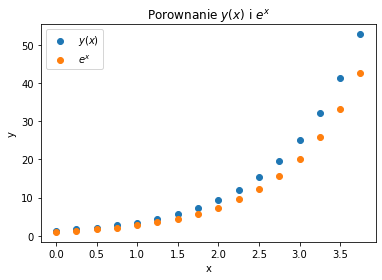

In [10]:
plt.scatter(np.arange(start,stop,step),result)
plt.scatter(np.arange(start,stop,step),expected)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Porownanie $y(x)$ i $e^x$')
plt.legend(['$y(x)$', '$e^x$'])

Mozemy wiec rowniez przedstawic roznice pomiedzy rozwiazaniem analitycznym a numerycznym na wykresie:

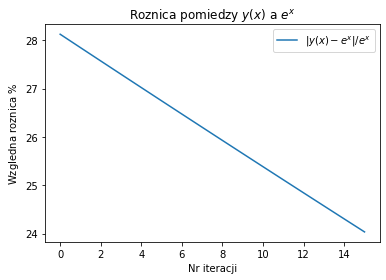

In [11]:
plt.plot([(np.abs(a-b)/b)*100 for a, b in zip(result, expected)])
plt.title('Roznica pomiedzy $y(x)$ a $e^x$')
plt.xlabel('Nr iteracji')
plt.ylabel('Wzgledna roznica $\%$')
plt.legend(['$|y(x)-e^x|/e^x$'])

## Gotowy kod w c++

```c++
#include <cmath>
#include <vector>

std::vector<double> 
euler(double (*f)(double, double), double start,
                                 double stop, double h, double y_0) {
    std::vector<double> results;

    // Ustawiamy poczatkowy numer iteracji na 0
    int n = 0;
    
    // Poczatkowa wartosc y_n to po prostu wartosc stala podana
    double y_n = y_0;

    // Przechodzimy po calym zadanym zakresie z podanym krokiem
    for (double x = start; x <= stop; x += h) {
        
        // Liczymy zmmiane y w punkcie x_n, y_n
        double f_n = f(x, y_n);
        
        // Liczymy zmmiane w kolejenym punkcie
        double f_m = f(x + h, y_n + h * f_n);
  
        // Wartosc y(x_n) jest rowna w przyblizeniu
        // poczatkowej wartosci nad ktora nadbudujemy kolejne 
        // zmiany dy/dx otrzymujac wartosci y_n. Ulepszenie nad 
        // Metoda Eulera polaga na dodawaniu sredniej pomiedzy kolejnymi punktami
        y_n = y_n + (h / 2.0) * (f_n + f_m);
  
        std::cout << n << "," << x << "," << y_n << std::endl;
        
        results.push_back(y_n);
        n++;
    }
    
    // Zwracamy otrzymane wartosci y_n dla podanych x_n
    return results;
}

double f(double x, double y) { return -sin(x) * sqrt(y); }

double g(double x, double y) { return y; }

const double pi = 3.1415926;

int main(int argc, const char** argv){
    
    // Badanie zad14 z y_0 = 0;
    std::cout << "Zad14 z y_0=0" << std::endl;
    std::cout << "n,\tx,\ty" << std::endl;
    double start = pi;
    double stop = (3.0 * pi)/2.0;
    double step = pi/20.0;
    double y_0 = 0.0;
    auto result = euler(f, start, stop, step, y_0);
    
    // Badanie zad14 z y_0 = 0 + \epsilon
    std::cout << "Zad14 z y_0=0 + epsilon" << std::endl;
    std::cout << "n,\tx,\ty" << std::endl;
    start = pi;
    stop = (3.0 * pi)/2.0;
    step = pi/20.0;
    y_0 = 0.1e-6;
    result = euler(f, start, stop, step, y_0);
    
    // Badanie funkcji wykladniczej
    std::cout << "Wykladnicza" << std::endl;
    std::cout << "n,\tx,\ty" << std::endl;
    start = 0;
    stop = 4;
    step = 0.25;
    y_0 = 1;
    result = euler(g, start, stop, step, y_0);
}

```